In [1]:
# Standard Libraries
import math
import random
import sys
from datetime import date, time, datetime
import datetime as dt
import warnings
import locale

# Data Manipulation and Analysis
import pandas as pd
import numpy as np
import re, unicodedata
import calendar as cal
import string
import statistics as st
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import statsmodels.api as sm 
from scipy import stats

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import *
from tqdm import tqdm

# Excel Export
import xlsxwriter

# Configuracion Tabla Visualization
pd.set_option('display.max_columns',2000)

In [ ]:
# Ajuste y cambio de nombres a las columnas
def clean_text(text):
    '''
    le pasas una frase y te hace la sustición de toda la simbologia
    
    '''
    res = unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
    res = re.sub("[^a-zA-Z0-9 ]"," ", res.decode("utf-8"), flags=re.UNICODE)
    res = u' '.join(res.upper().split())
    return res

def rename_col(df, col, prefijo):
    new_col = [prefijo+'_' +
               '_'.join(x.strip().upper().split(' ')) for x in col]
    new_col = [unicodedata.normalize("NFKD", s).encode("ascii", "ignore").decode(
        "ascii").replace('\n', '').replace('.', '') for s in new_col]
    df.rename(columns=dict(zip(col, new_col)), inplace=True)

# Creacion de completitud tabla
def completitud(df, solo_nulos=True):
    aux = df.isnull().sum().reset_index().rename(
        columns={'index': 'columna', 0: 'absoluto'})
    aux['%'] = aux['absoluto']/df.shape[0]
    if solo_nulos:
        return aux[aux['absoluto'] > 0]
    else:
        return aux

# Descripcion de tabla
def desc_table(df):
    n = 50
    simbolo = '*'
    k = 2  # saltos de linea

    print(' DIMENSIONES DE LA TABLA'.center(n, *), end='\n'*k)
    display(df.shape)
    print(' MUESTRA DE TABLAS'.center(n, simbolo), end='\n'*k)
    display(df.head())
    print(' INFORMACION DE COLUMNAS'.center(n, *), end='\n'*k)
    display(df.info())
    print(' TABLA DE COMPLETITUD'.center(n, *), end='\n'*k)
    display(completitud(df))
    print(' DUPLICADOS'.center(n, *), end='\n'*k)
    display(df.duplicated().sum())


In [3]:
link_info = r'C:\Users\1294082\OneDrive - Autos Pullman, S.A. de C.V\Escritorio'

In [4]:
activity_data = pd.read_csv(link_info + '\\' + 'activity.csv', encoding='latin1')


In [5]:
# Show information
activity_data.head()

,steps,date,interval
0,NaN,2012-10-01,0
1,NaN,2012-10-01,5
2,NaN,2012-10-01,10
3,NaN,2012-10-01,15
4,NaN,2012-10-01,20


In [6]:
activity_data.columns

Index(['steps', 'date', 'interval'], dtype='object')

# Exploration 

In [7]:
desc_table(activity_data)

************* DIMENSIONES DE LA TABLA*************



(17568, 3)

**************** MUESTRA DE TABLAS****************



,steps,date,interval
0,NaN,2012-10-01,0
1,NaN,2012-10-01,5
2,NaN,2012-10-01,10
3,NaN,2012-10-01,15
4,NaN,2012-10-01,20


************* INFORMACION DE COLUMNAS*************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17568 entries, 0 to 17567
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   steps     15264 non-null  float64
 1   date      17568 non-null  object 
 2   interval  17568 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 411.9+ KB


None

************** TABLA DE COMPLETITUD***************



,columna,absoluto,%
0,steps,2304,0.131148


******************* DUPLICADOS********************



0

In [8]:
#Ajuste a mayusculas de las columnas del dataframe
activity_data.columns      =  [clean_text(i).replace(' ','_').upper()  for i in activity_data.columns.tolist() ]

In [9]:
activity_data.head(5)

,STEPS,DATE,INTERVAL
0,NaN,2012-10-01,0
1,NaN,2012-10-01,5
2,NaN,2012-10-01,10
3,NaN,2012-10-01,15
4,NaN,2012-10-01,20


# Cleaning Data

In [10]:
activity_data['DATE'] = pd.to_datetime(activity_data['DATE'],yearfirst=True)

In [11]:
activity_data['YEAR'] = activity_data['DATE'].dt.year

In [12]:
activity_data['MOUNT'] = activity_data['DATE'].dt.month

In [13]:
activity_data['WEEKDAY'] = activity_data['DATE'].dt.dayofweek

In [14]:
# Define a dictionary to map weekday numbers to their names
weekday_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

# Use the map function to replace values in the 'WEEKDAY' column
activity_data['WEEKDAY'] = activity_data['WEEKDAY'].map(weekday_mapping).fillna('Error')

In [15]:
# Assuming activity_data is your DataFrame
activity_data['STEPS'].replace('NA', np.nan, inplace=True)

In [16]:
activity_data['STEPS'].dtype

dtype('float64')

# Creating AUX TABLES to view analisis

In [18]:
df_order = activity_data[['YEAR','MOUNT','DATE','WEEKDAY','INTERVAL','STEPS']].reset_index(drop=True)

In [26]:
df_order.sort_values(by = 'DATE',inplace = True)

# Plot

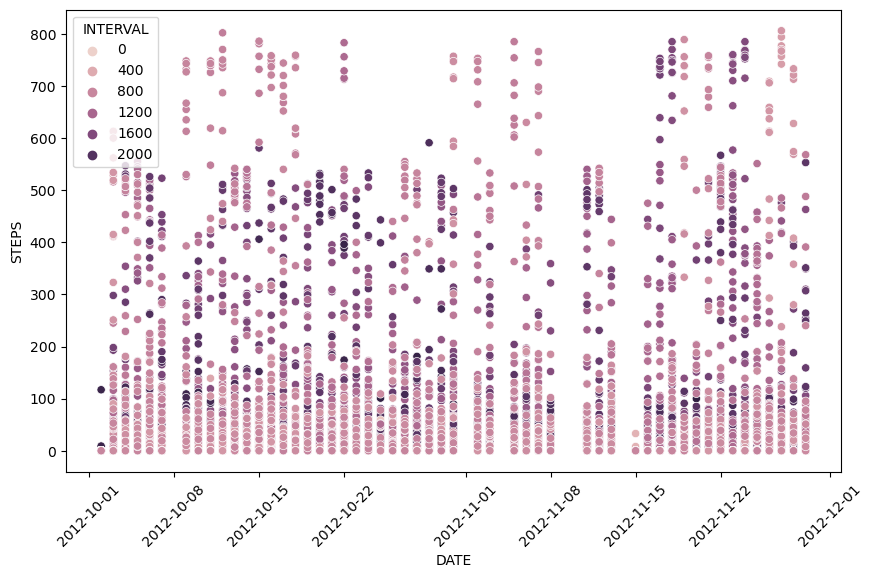

In [27]:
# Adjust the figure size as needed
plt.figure(figsize=(10, 6))  

# Create the scatterplot with hue for coloring by 'INTERVAL'
sns.scatterplot(data=df_order, x='DATE', y='STEPS', hue='INTERVAL')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.show()

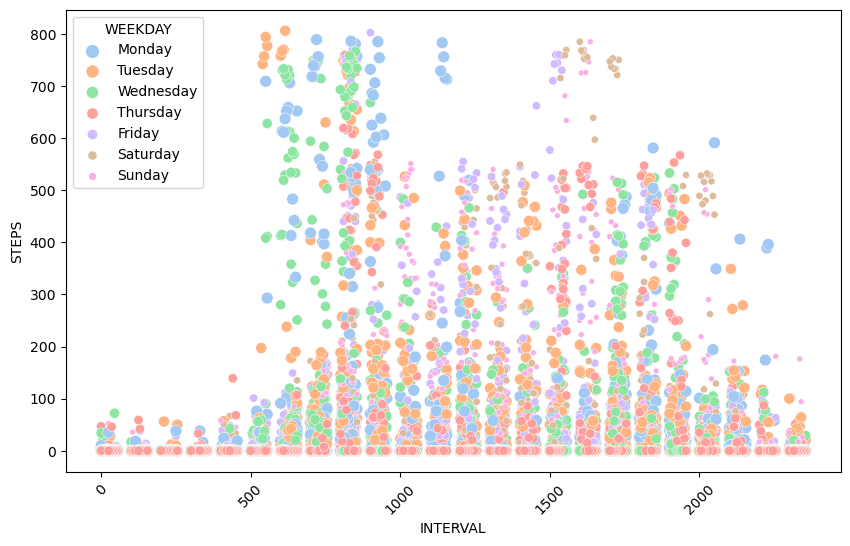

In [58]:
# Adjust the figure size as needed
plt.figure(figsize=(10, 6))  

# Create the scatterplot with hue for coloring by 'INTERVAL'
sns.scatterplot(data=df_order, x='INTERVAL', y='STEPS', hue = 'WEEKDAY' ,size='WEEKDAY')
sns.set_palette("pastel")
# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.show()

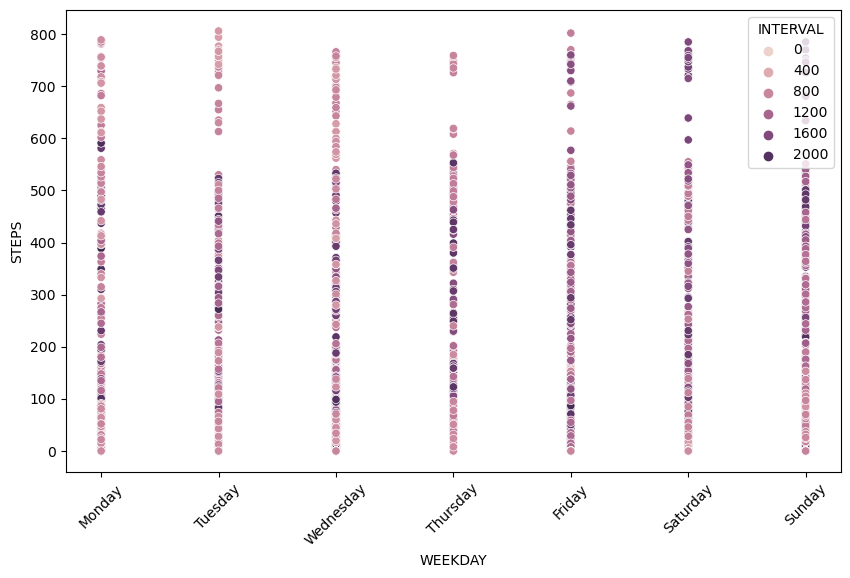

In [28]:
# Adjust the figure size as needed
plt.figure(figsize=(10, 6))  

# Create the scatterplot with hue for coloring by 'INTERVAL'
sns.scatterplot(data=df_order, x='WEEKDAY', y='STEPS', hue='INTERVAL')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.show()

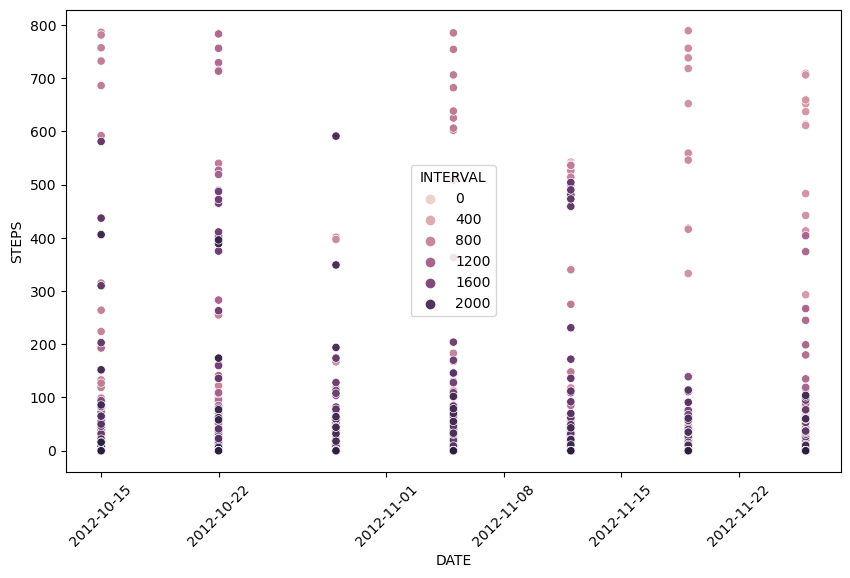

In [25]:
# Adjust the figure size as needed
plt.figure(figsize=(10, 6))  

# Create the scatterplot with hue for coloring by 'INTERVAL'
sns.scatterplot(data=df_order[df_order['WEEKDAY']=='Monday'], x='DATE', y='STEPS', hue='INTERVAL')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.show()

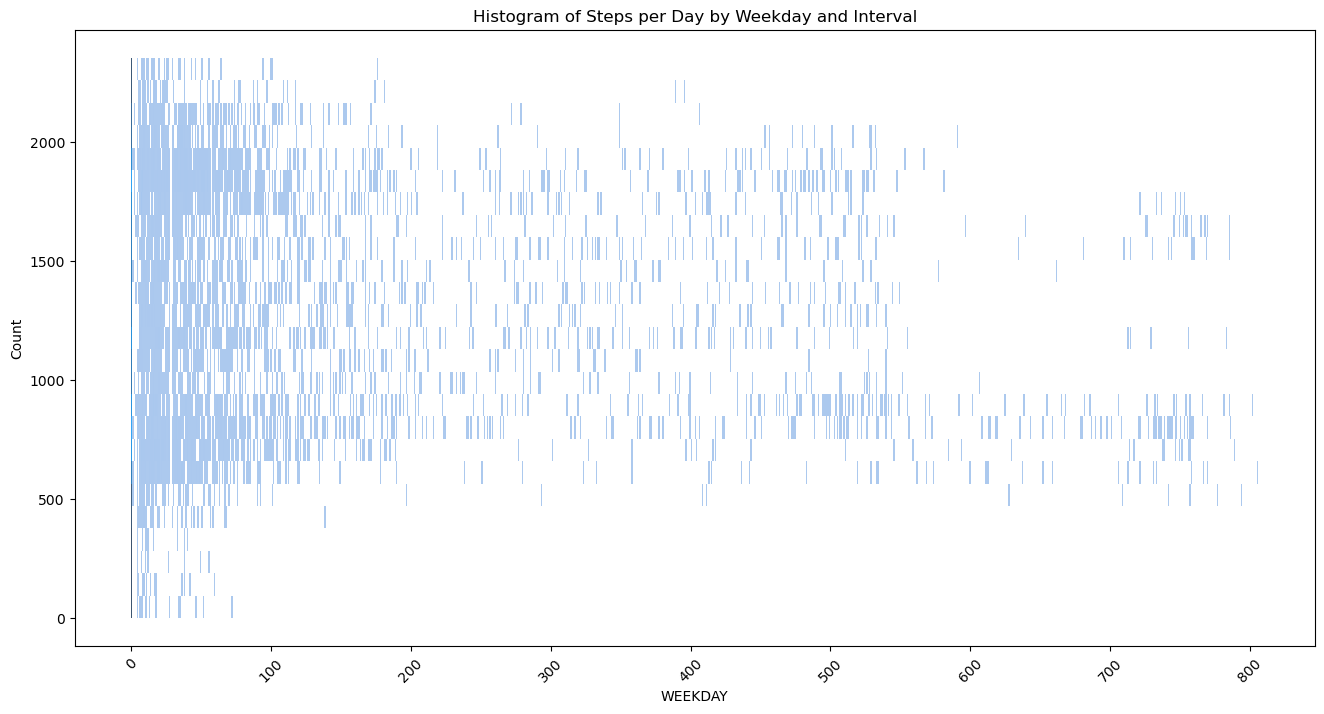

In [35]:
plt.figure(figsize=(16, 8))  # Adjust the figure size as needed

# Create the histogram with hue for coloring by 'INTERVAL'
sns.histplot(data=df_order,x = 'STEPS', y = 'INTERVAL')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)
plt.xlabel('WEEKDAY')
plt.ylabel('Count')
plt.title('Histogram of Steps per Day by Weekday and Interval')
plt.show()

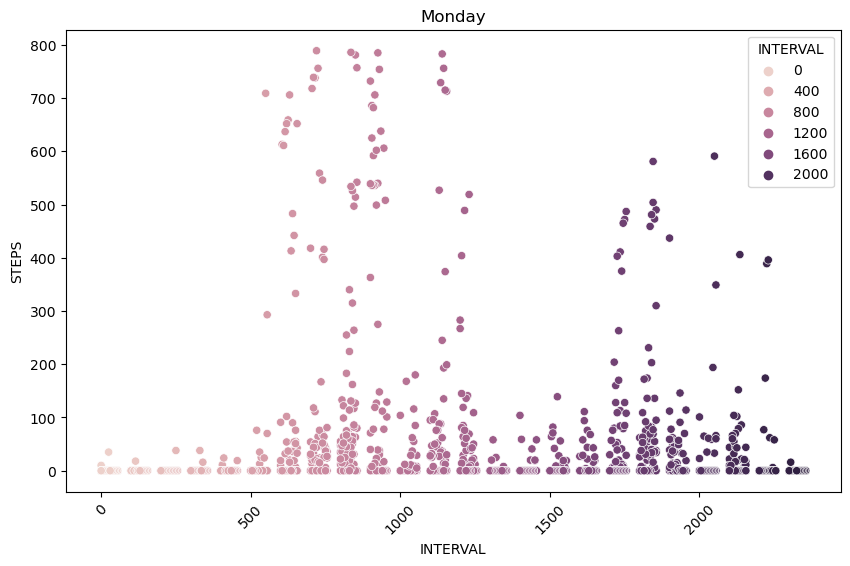

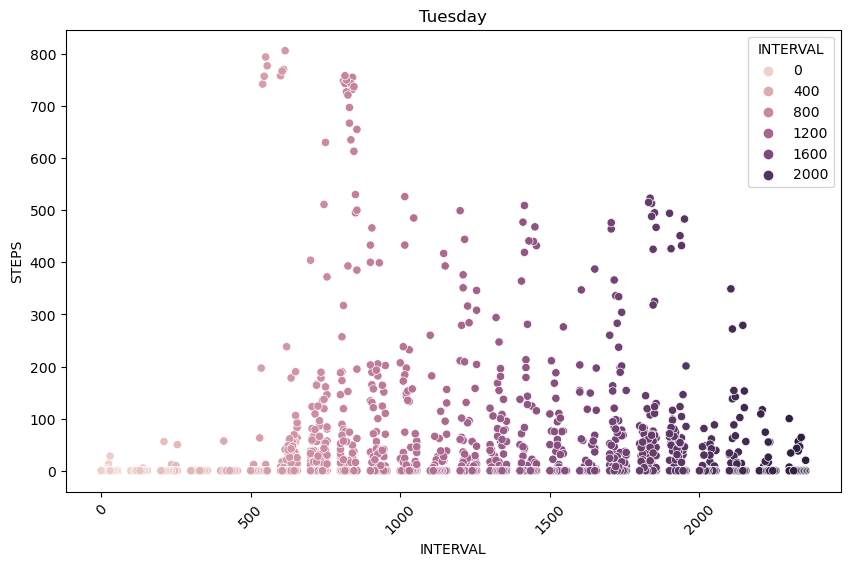

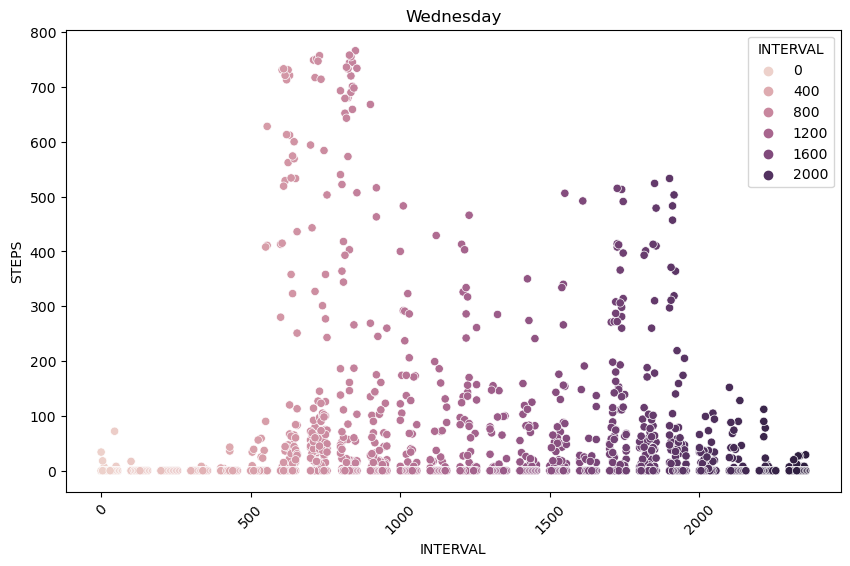

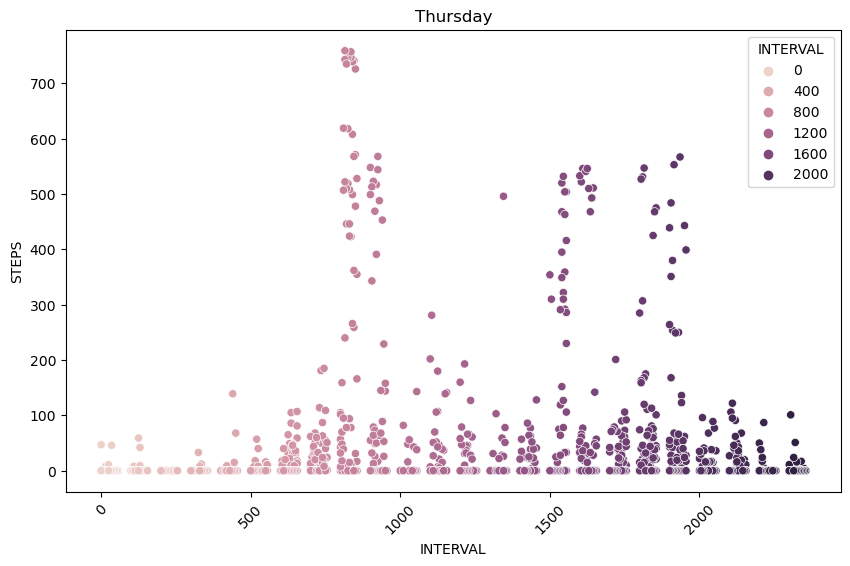

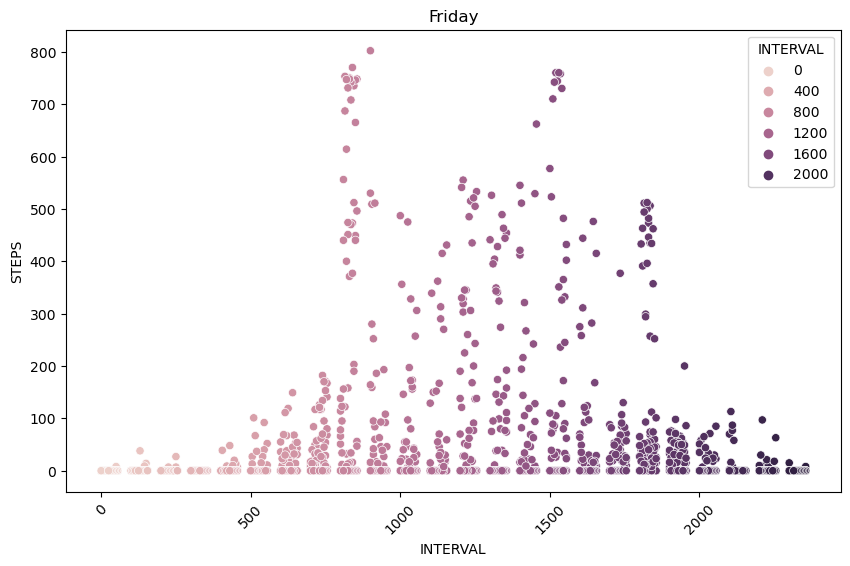

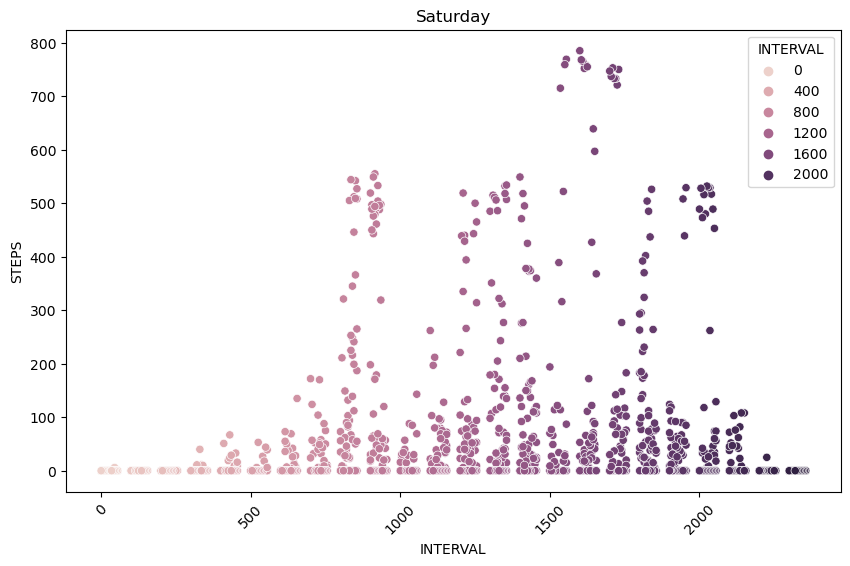

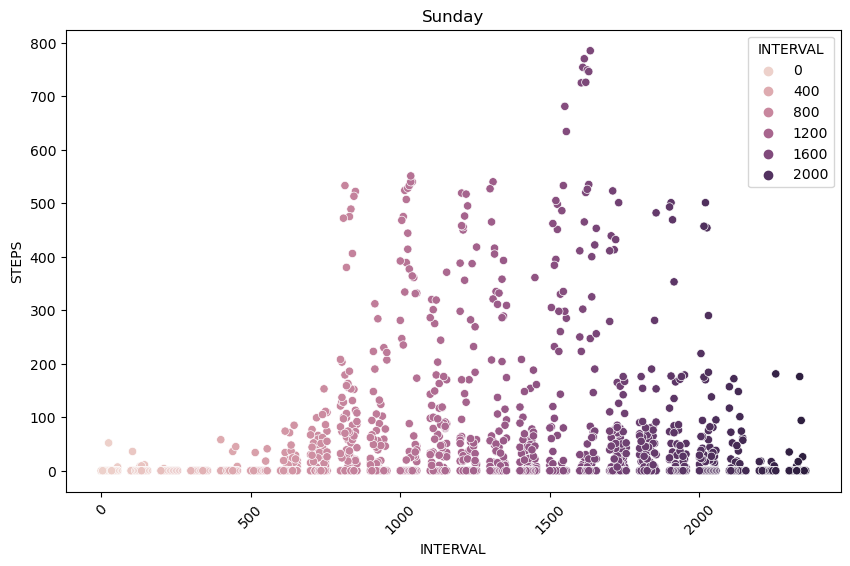

In [49]:
# Get unique weekdays
unique_weekdays = df_order['WEEKDAY'].unique()

# Loop through unique weekdays and create scatterplots
for weekday in unique_weekdays:
    # Adjust the figure size as needed
    plt.figure(figsize=(10, 6))  
    
    # Filter the DataFrame for the current weekday
    data_for_weekday = df_order[df_order['WEEKDAY'] == weekday]
    
    # Create the scatterplot with hue for coloring by 'INTERVAL'
    ax = sns.scatterplot(data=data_for_weekday, x='INTERVAL', y='STEPS', hue='INTERVAL')
    
    # Rotate the x-axis labels by 45 degrees
    ax.set_title(weekday)  # Set the title for the current plot
    plt.xticks(rotation=45)
    
    # Show the plot for the current weekday
    plt.show()

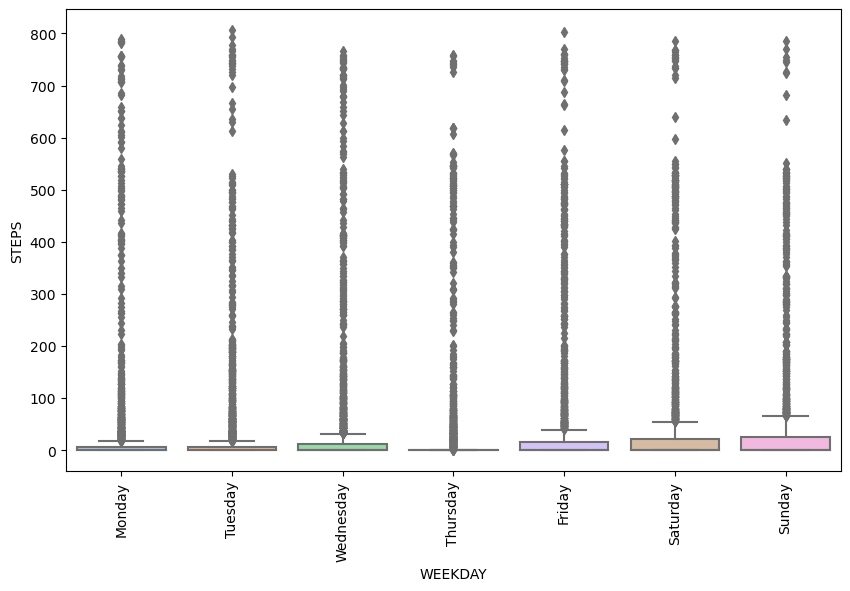

In [76]:
# Adjust the figure size as needed
plt.figure(figsize=(10, 6))  

# Create the scatterplot with hue for coloring by 'INTERVAL'
sns.boxplot(data = df_order, x='WEEKDAY', y='STEPS'#,hue = 'INTERVAL'
           )

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=90)

plt.show()